## Support Vector Machines and Kernels 

### Introduction 
We will be using the wine quality data set.  This data set contains various chemical properties of wine, such as acidity, sugar, pH and alcohol.  It also contains a quality metric (3-9, with highest being better) and a color (red or white).  The name of the file is `Wine_Quality_Data.csv`. 

In [1]:
from __future__ import print_function 
import os 

data_path = ['C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101-Class7/data']

### Question 1
* Import the data 
* Create the target variable `y` as a 1 or 0 column where 1 means red. 
* Create a `pairplot` for the dataset. 
* Create a bar plot showing the correlations between each column and `y`
* Pick the 2 most correlated fields (using the absolute value of correlations) and create `X`
* Use `MinMaxScaler` to scale `X`. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately 


In [2]:
import pandas as pd 
import numpy as np 

filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep = ',')

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [21]:
# astype() casts a pandas object to a specified dtype
y = (data['color'] == 'red').astype(int) # casts 'red' rows as integer 1

fields = list(data.columns[:-1]) # list of X column names 

# correlations between X features and y 
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace = True) 

In [22]:
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [89]:
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline 

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

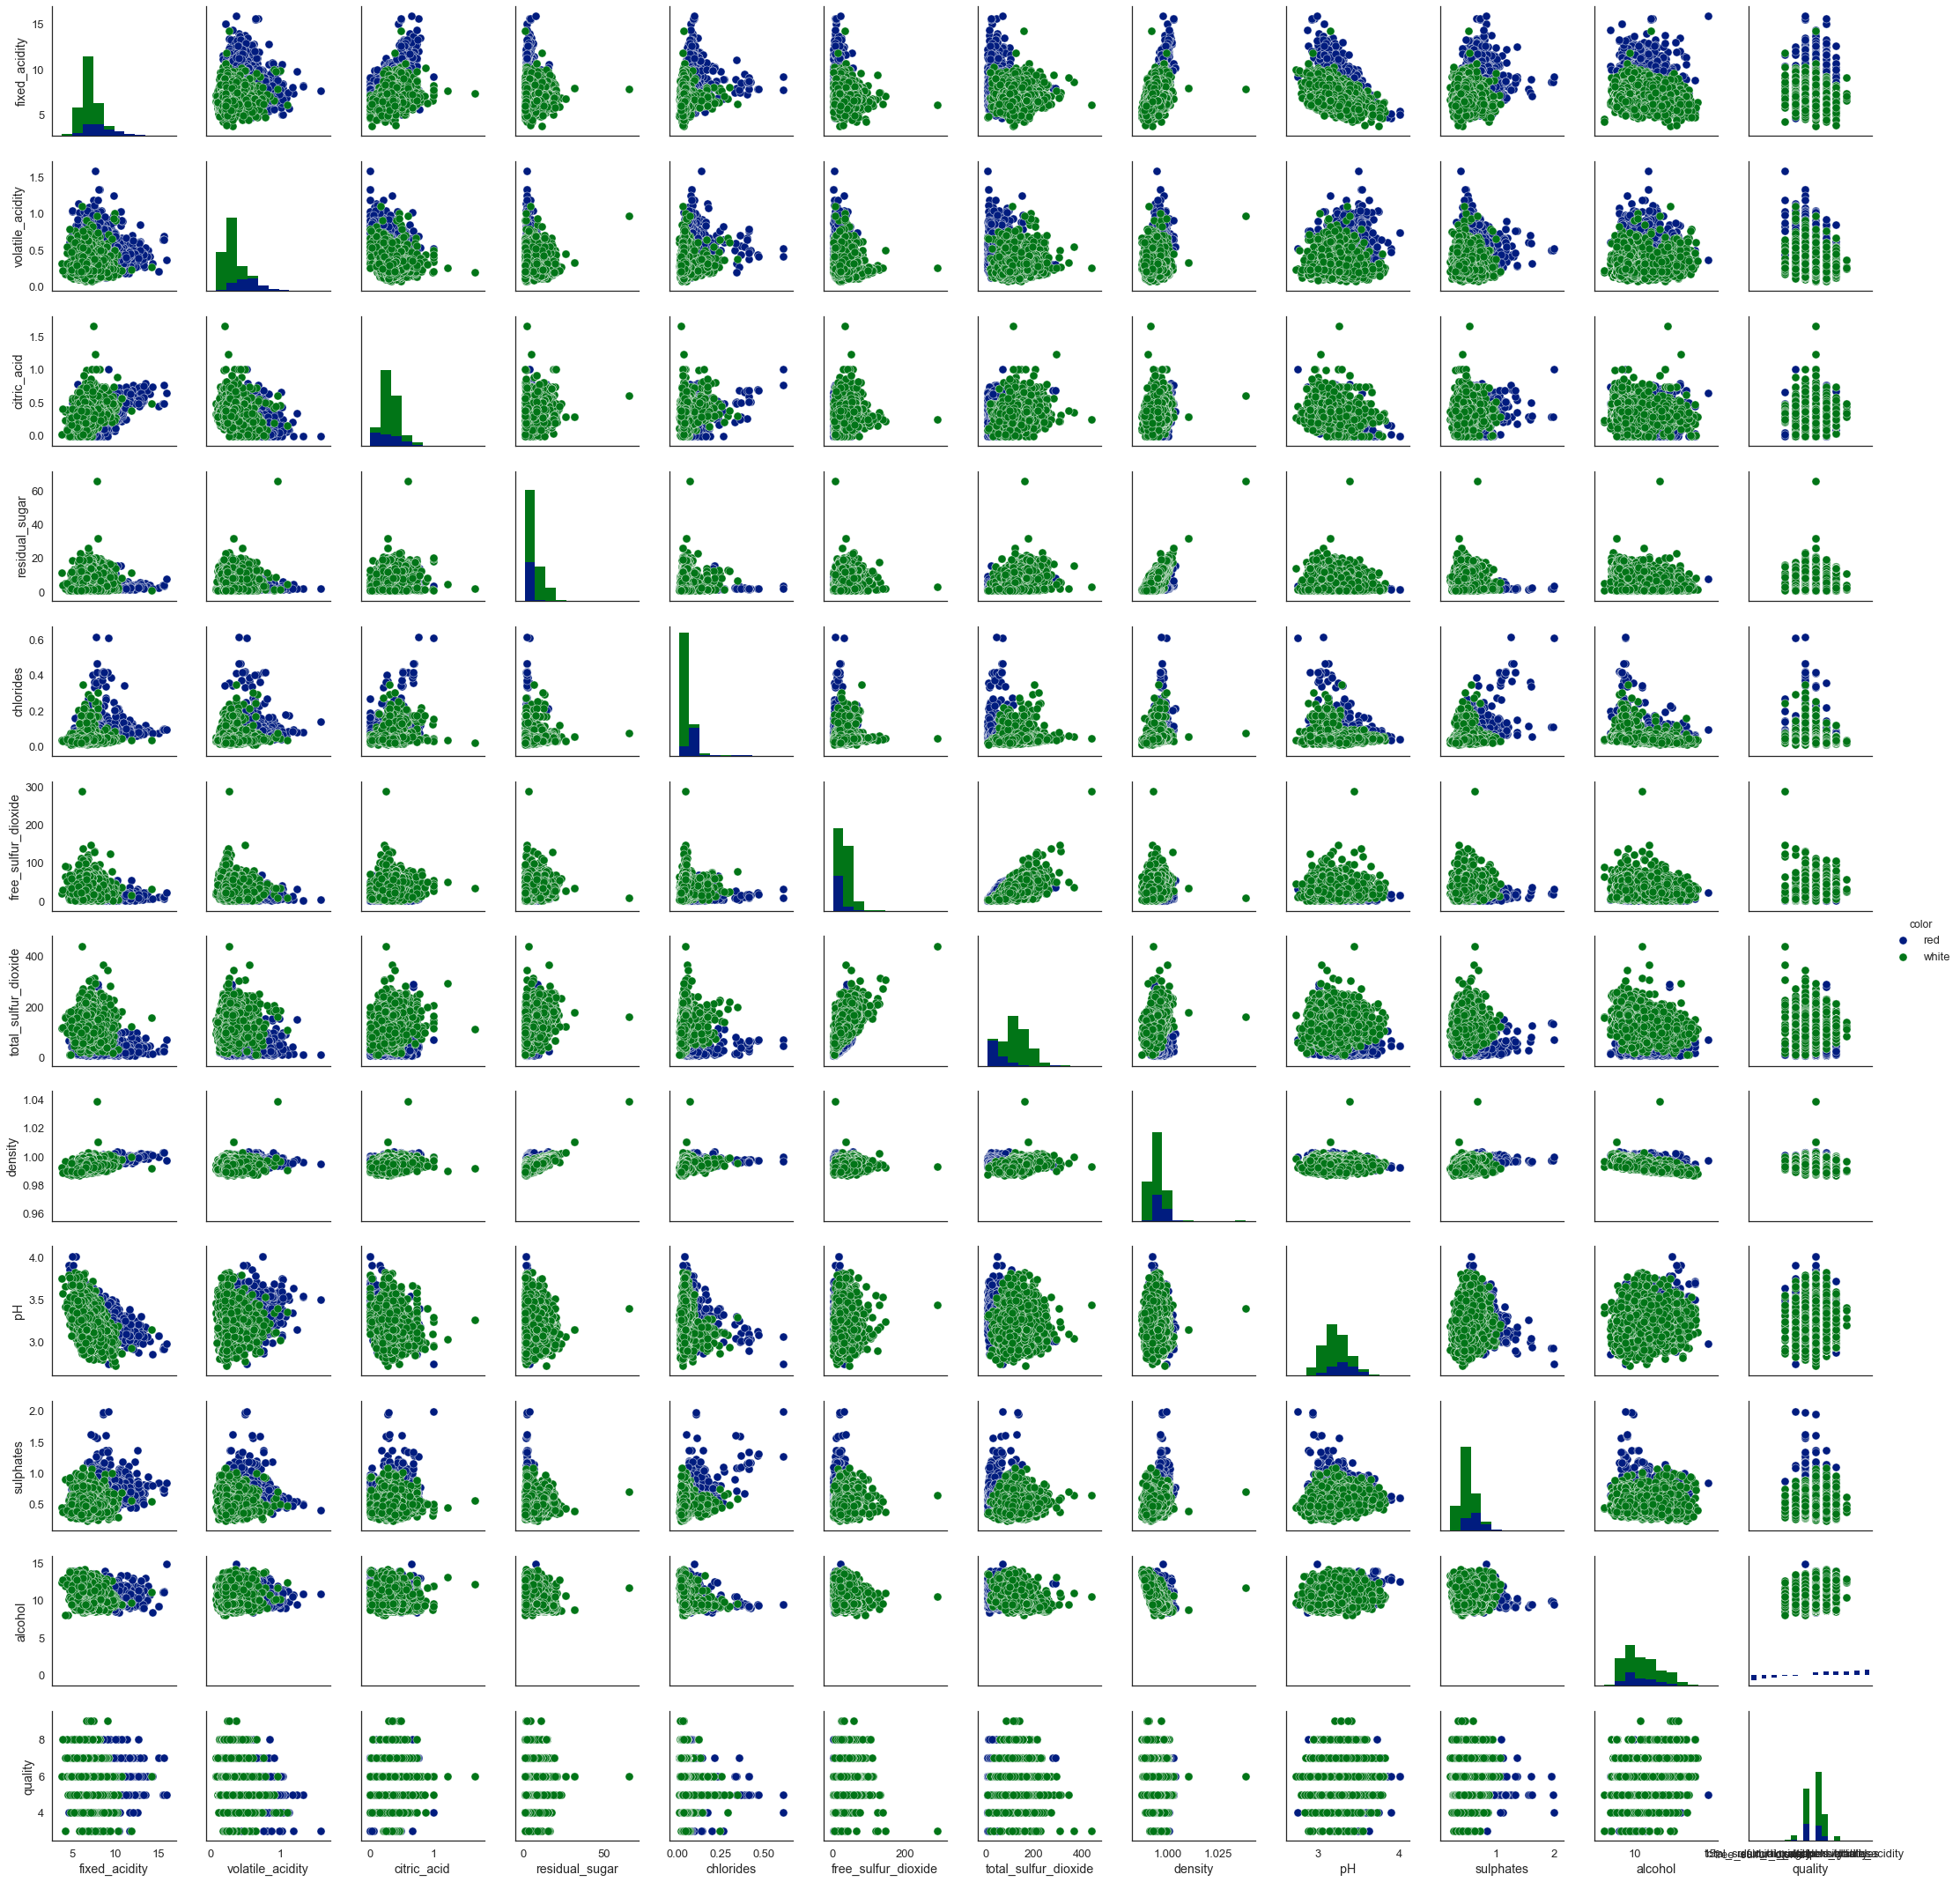

In [90]:
sns.pairplot(data, hue = 'color')
ax = correlations.plot(kind = 'bar')
#ax.set(ylim = [-1,1], ylabel = 'pearson correlation'); # ylim limits y-axis

In [91]:
from sklearn.preprocessing import MinMaxScaler

# take absolute value and sort correlation values 
correlations.map(abs).sort_values()

alcohol                 0.032970
quality                 0.119323
citric_acid             0.187397
pH                      0.329129
residual_sugar          0.348821
density                 0.390645
free_sulfur_dioxide     0.471644
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

In [92]:
# 2 most correlated fields 
fields = correlations.map(abs).sort_values().iloc[-2:].index
fields

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')

In [93]:
# X is 2 most correlated fields 
X = data[fields]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[ 0.41333333,  0.06451613],
       [ 0.53333333,  0.140553  ],
       [ 0.45333333,  0.11059908],
       ..., 
       [ 0.10666667,  0.24193548],
       [ 0.14      ,  0.23963134],
       [ 0.08666667,  0.21198157]])

In [94]:
# convert np.array into dataframe
X = pd.DataFrame(X, columns = ['%s_scaled' % fld for fld in fields])
X.columns 

X.head()

,volatile_acidity_scaled,total_sulfur_dioxide_scaled
0,0.413333,0.064516
1,0.533333,0.140553
2,0.453333,0.110599
3,0.133333,0.124424
4,0.413333,0.064516


### Question 2 
The goal for this question is to look at the decision boundary of a `LinearSVC` classifier on tihs dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 
* Fit a Linear Support Vector Machine Classifier to `X, y`. 
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot. 
* Modify `y_color` so that it has the value 'red' instead of 1 and 'yellow' instead of 0. 
* Scatterplot `X_color` columns. Use the keyword argument `color = y_color` to color code samples. 
* Use the code snippet below to plot the decision surface in a color coded way. 

`x_axis, y_axis = np.arange(0,1,0.005), np.arange(0,1,0.005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions, cmap = plt.cm.autumn_r, alpha = 0.3)`

Feel free to experiment with different parameter choices for Linear SVC and see the decision boundary. 

In [95]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y) 

X_color = X.sample(300, random_state = 45) 
X_color.index

Int64Index([2691, 5843, 5509, 2880, 3286, 1341,  736, 6436, 1360, 2672,
            ...
            3191, 3650, 5930, 4945,  167,  358, 5724, 1552, 5746,   64],
           dtype='int64', length=300)

In [96]:
X_color.head()

,volatile_acidity_scaled,total_sulfur_dioxide_scaled
2691,0.086667,0.345622
5843,0.186667,0.253456
5509,0.193333,0.306452
2880,0.126667,0.373272
3286,0.120000,0.435484


In [97]:
y_color = y.loc[X_color.index]
y_color.head()

2691    0
5843    0
5509    0
2880    0
3286    0
Name: color, dtype: int32

In [98]:
# change to 'red if y = 1, 'yellow' if y = 0
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow') 
y_color.head()

2691    yellow
5843    yellow
5509    yellow
2880    yellow
3286    yellow
Name: color, dtype: object

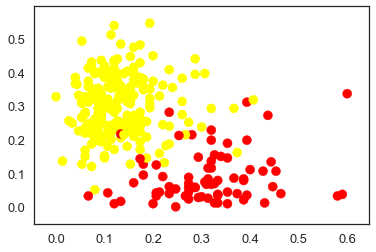

In [101]:
ax = plt.axes()
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:,1], 
           color = y_color, alpha = 1); 

In [111]:
## Plot decision surface in a color coded way  
x_axis, y_axis = np.arange(0, 1.005, 0.005), np.arange(0, 1.005, 0.005)

# meshgrid creates a rectangular grid out of an array of x and y values 
# x =   0 0 0 0 0        y =   0 1 2 3 4
#       1 1 1 1 1              0 1 2 3 4
#       2 2 2 2 2              0 1 2 3 4
#       3 3 3 3 3              0 1 2 3 4
#       4 4 4 4 4              0 1 2 3 4
xx, yy = np.meshgrid(x_axis, y_axis)
xx

array([[ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       ..., 
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ]])

In [112]:
yy

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.005,  0.005,  0.005, ...,  0.005,  0.005,  0.005],
       [ 0.01 ,  0.01 ,  0.01 , ...,  0.01 ,  0.01 ,  0.01 ],
       ..., 
       [ 0.99 ,  0.99 ,  0.99 , ...,  0.99 ,  0.99 ,  0.99 ],
       [ 0.995,  0.995,  0.995, ...,  0.995,  0.995,  0.995],
       [ 1.   ,  1.   ,  1.   , ...,  1.   ,  1.   ,  1.   ]])

In [118]:
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
xx_ravel

array([ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ])

In [123]:
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
X_grid.head()

,0,1
0,0.000,0.0
1,0.005,0.0
2,0.010,0.0
3,0.015,0.0
4,0.020,0.0


In [117]:
y_grid_predictions = LSVC.predict(X_grid)

40401

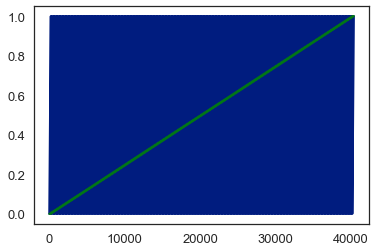

In [125]:
plt.plot(X_grid);